# INTRODUCTION

Obesity is a medical conditiondefined as having excess amounts of body fat. Obesity is asociated with other health conditions such as heart disease, diabetes, hypertension and certain types of cancers. Obesity is largely a lifestyle condition with  with poor diet,minimal physical activity and exercise choices playing a major role in contributing to the surging cases of obesity.



# Dataset Details 

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.



## Sources


Fabio Mendoza Palechor, Alexis de la Hoz Manotas,
Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico,
Data in Brief,
Volume 25,
2019,
104344,
ISSN 2352-3409,
https://doi.org/10.1016/j.dib.2019.104344.
(https://www.sciencedirect.com/science/article/pii/S2352340919306985)


https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# Description of columns.

* Age: Age of respondents in years
* Height: Height measured in meters
* Weight: Weight measured in kgs
* Family_history:
* FAVC: Frequency of consumption of high caloric food
* FVCV: Frequency of consumption of vegetables 
* NCP: Number of main meals
* CAEC: Consumption of food between meals (snacking)
* SMOKE: Whether the respondent is a smoker 
* CH20: Daily water consumption
* SCC: Monitering of calories consumption
* FAF: Physical Activity Frequency
* TUE: Time Using Technological Devices
* CALC: Alchohol Consumption
* MTRANS:Means of transport commonly used by respondent
* NOObesity: level of obesity(1-4)


# Project Deliverables

create a model for prediction of level of obesity in an individual

# Imports 

In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pickle
import warnings

# Dataset

In [646]:
Obesity_data = pd.read_csv('./data/ObesityDataSet.csv')

Obesity_data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [647]:
#column rename
Obesity_data = Obesity_data.rename(columns = {'FAVC': 'High_Calorie_Food_Consumption', 'FCVC':'Vegetable_Consumption' ,
                                              'NCP':'Number_of_Main_Meals','CALC':'Alchohol_Consumption','MTRANS':'Means_of_Transport',
                                           'CAEC': 'Snacking_Frequency', 'CH2O': 'Water_consumption', 'SCC': 'Calorie_Monitoring',
                                              'FAF':'Physical_activity_level','TUE':'Technology_Use_Time','NObeyesdad':'Obesity_level' }, inplace = False)

In [648]:
Obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie_Food_Consumption,Vegetable_Consumption,Number_of_Main_Meals,Snacking_Frequency,SMOKE,Water_consumption,Calorie_Monitoring,Physical_activity_level,Technology_Use_Time,Alchohol_Consumption,Means_of_Transport,Obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# EDA

In [649]:
#data types
Obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   High_Calorie_Food_Consumption   2111 non-null   object 
 6   Vegetable_Consumption           2111 non-null   float64
 7   Number_of_Main_Meals            2111 non-null   float64
 8   Snacking_Frequency              2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  Water_consumption               2111 non-null   float64
 11  Calorie_Monitoring              2111 non-null   object 
 12  Physical_activity_level         21

In [650]:
#data distribution
Obesity_data.describe()

,Age,Height,Weight,Vegetable_Consumption,Number_of_Main_Meals,Water_consumption,Physical_activity_level,Technology_Use_Time
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [651]:
#null values
Obesity_data.isnull().value_counts().unstack()

,,,,,,,,,,,,,,,Obesity_level,False
Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie_Food_Consumption,Vegetable_Consumption,Number_of_Main_Meals,Snacking_Frequency,SMOKE,Water_consumption,Calorie_Monitoring,Physical_activity_level,Technology_Use_Time,Alchohol_Consumption,Means_of_Transport,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2111


### Numerical Feature analysis

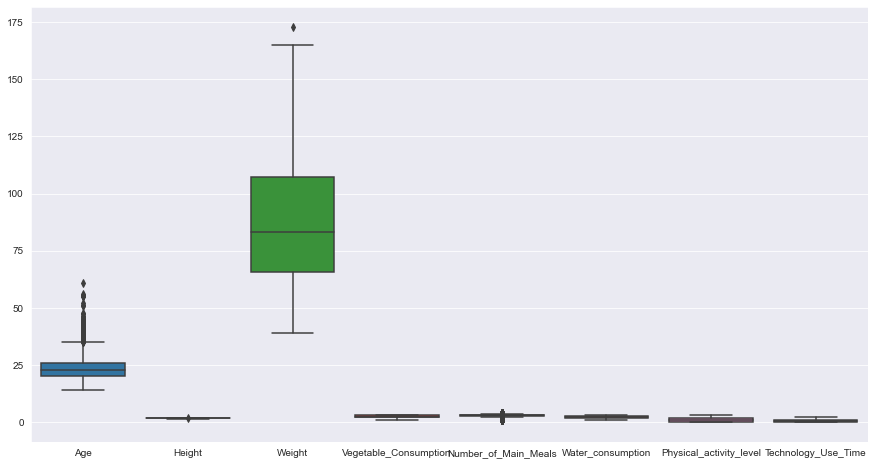

In [652]:
#Box plots
sns.set_style('darkgrid')
numerical = Obesity_data.select_dtypes(include=[float])

plt.figure(figsize=(15,8))
fig = sns.boxplot(data=numerical)


### Observations on results

From initial results the following inferences can be made:
* The datase contains 2111 instances
* There are no missing values in the dataset
* The dataset has 16 features distributed between numerical and categorical data
* The Target variable in the dataset is Obesity_level
* the columns Age, Number of main meals, height and weight appear to have outliers. Further Investigation is Required

### Investigation of Age,Num_main_meals,weight,Height

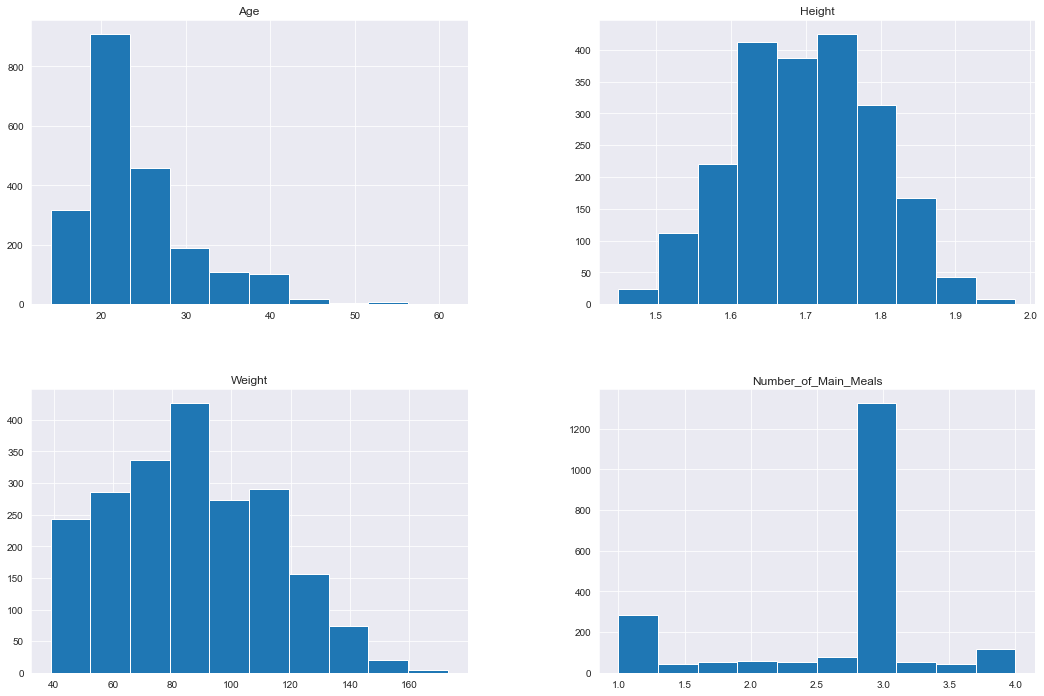

In [653]:
cols= numerical[['Age','Height','Weight','Number_of_Main_Meals']]
fig = cols.hist(figsize=(18,12))
plt.show()

<Figure size 432x288 with 0 Axes>

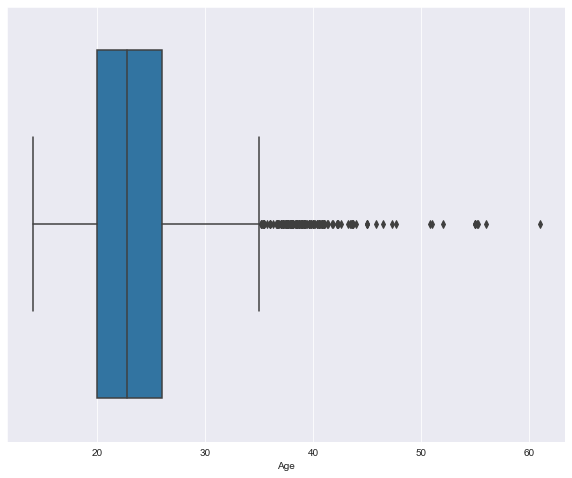

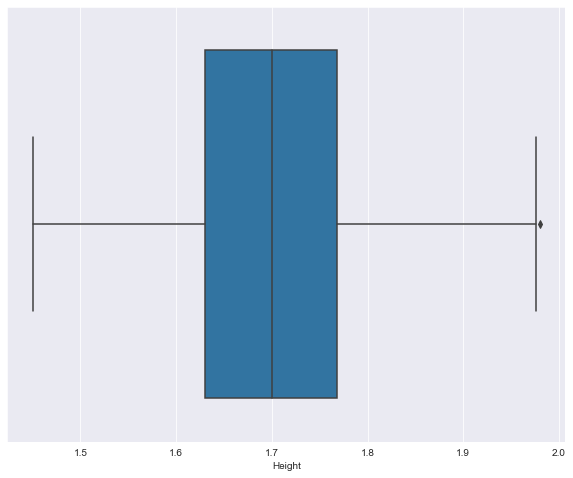

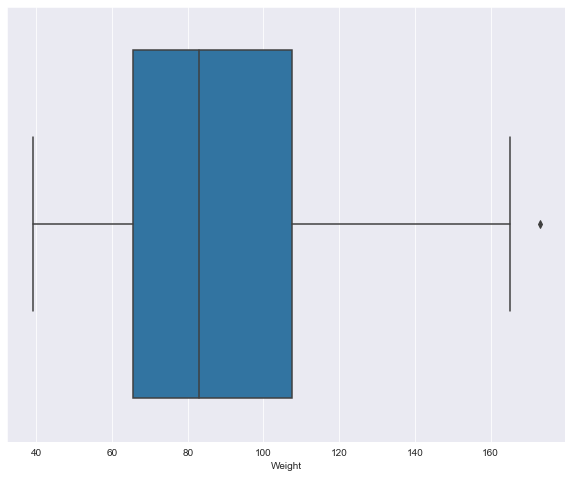

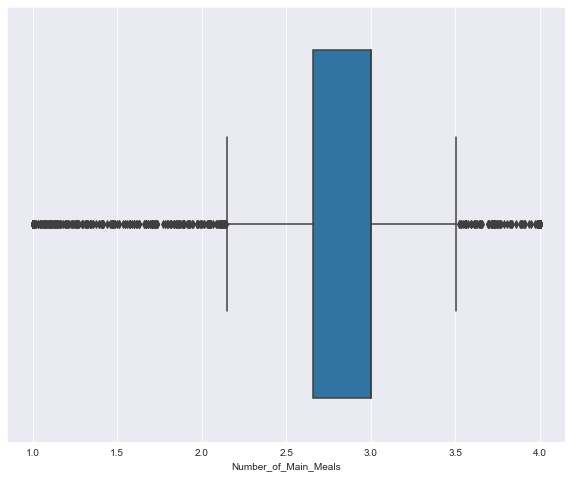

In [654]:
cols = pd.DataFrame(numerical[['Age','Height','Weight','Number_of_Main_Meals']])
for i, col in enumerate(cols.columns):
    plt.figure(i)
    plt.figure(figsize=(10,8))
    sns.boxplot(x=col, data=cols)

### Observation On Results

* Number of meals has both the upper and lower outliers
* Age,weight,height has outliers on its upper side
* A large percentage of people have an average of 3 meals per day
* Height,Age and Weight are to a large degree normally distributed while Number of meals experiences skewness


### Categroical Feature analysis 

In [655]:
categoricals= Obesity_data.select_dtypes(include=[object])

<Figure size 432x288 with 0 Axes>

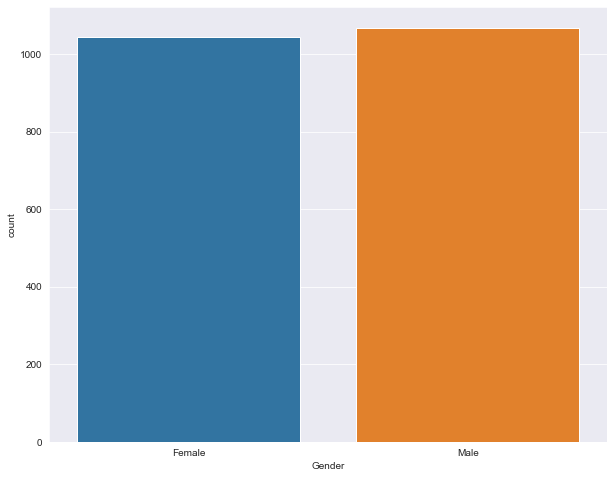

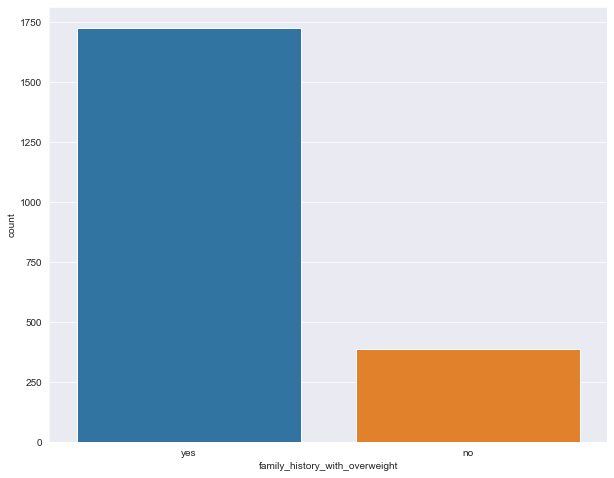

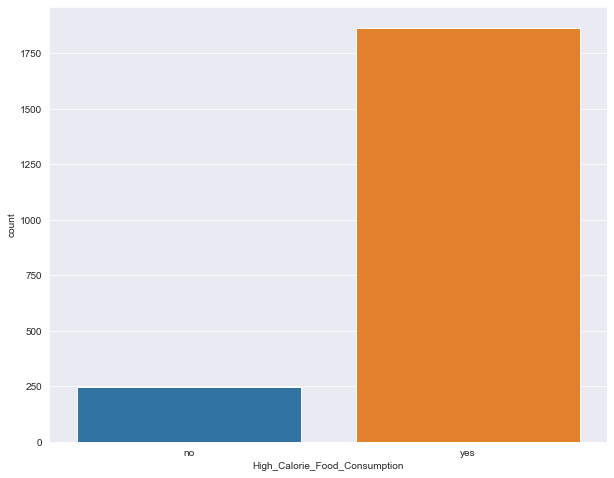

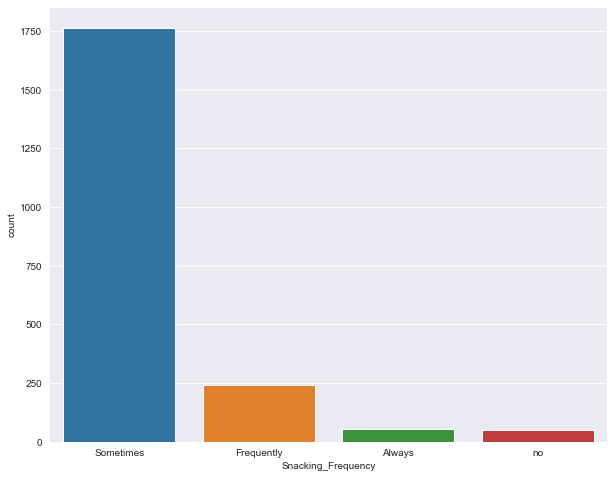

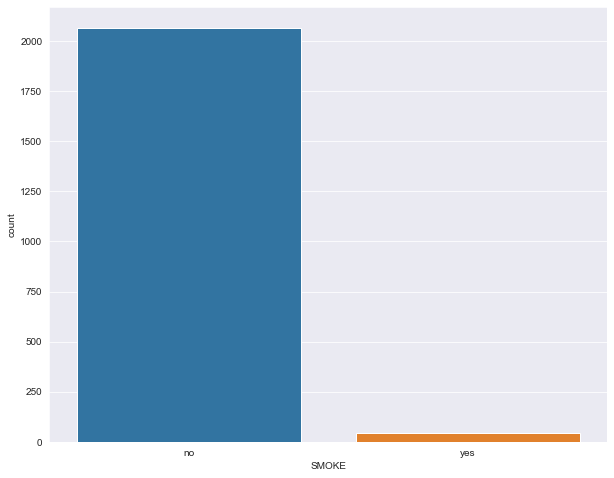

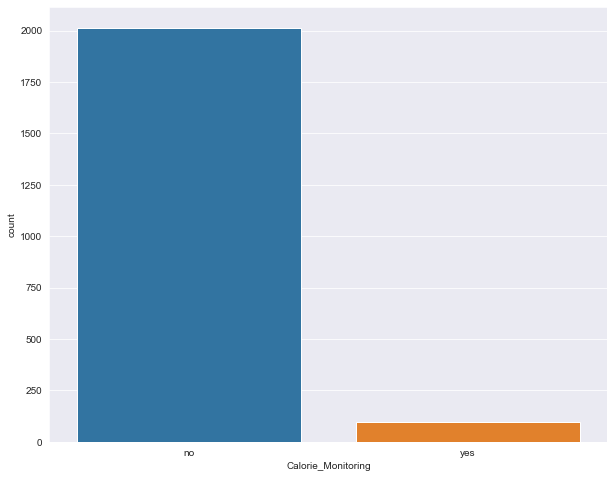

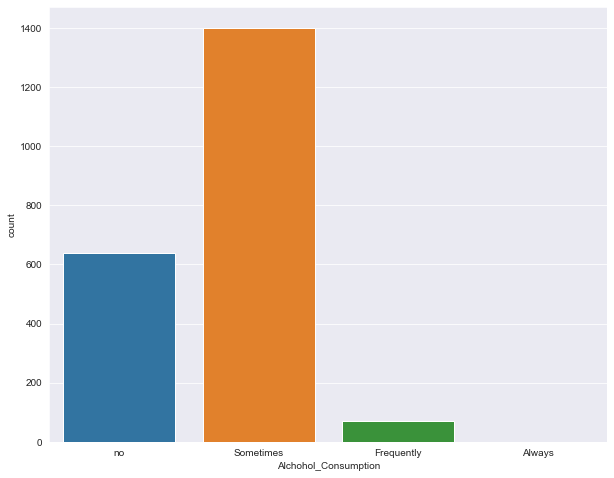

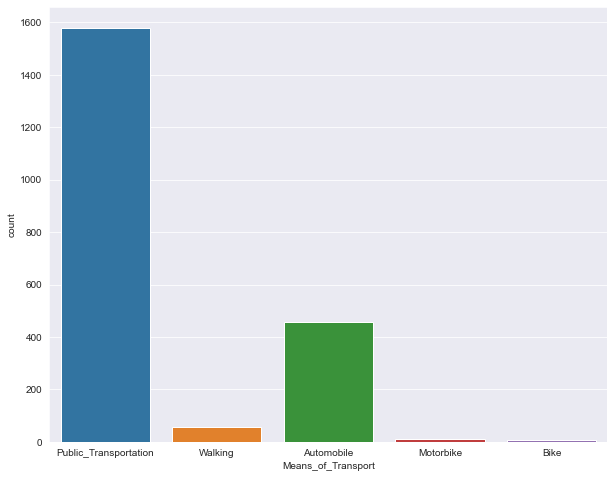

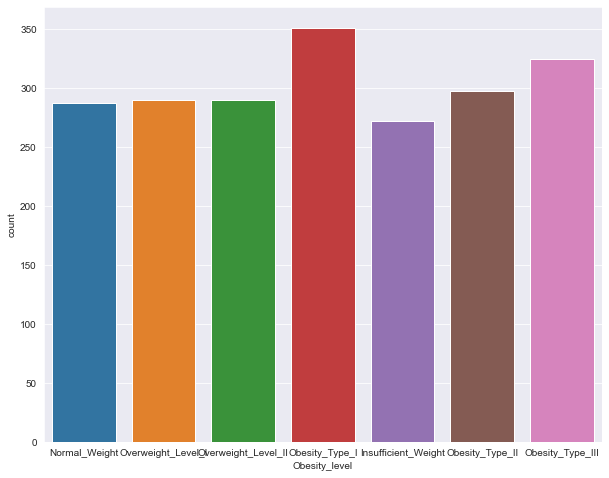

In [656]:
#Distribution of categorical features
for i, col in enumerate(categoricals.columns):
    plt.figure(i)
    plt.figure(figsize=(10,8))
    sns.countplot(x=col, data=categoricals)

### Observation from results 
* There is fairly equal representation of both genders in the study
* Most respondents have a family history with being overweight
* Most respondents have high colorie food intake
* The snacking,Means of Transport and Alchohol consumption columns have outliers that will be handled through rare levels method
* Most of the people in the study are none smokers

### Obesity levels in different demographics

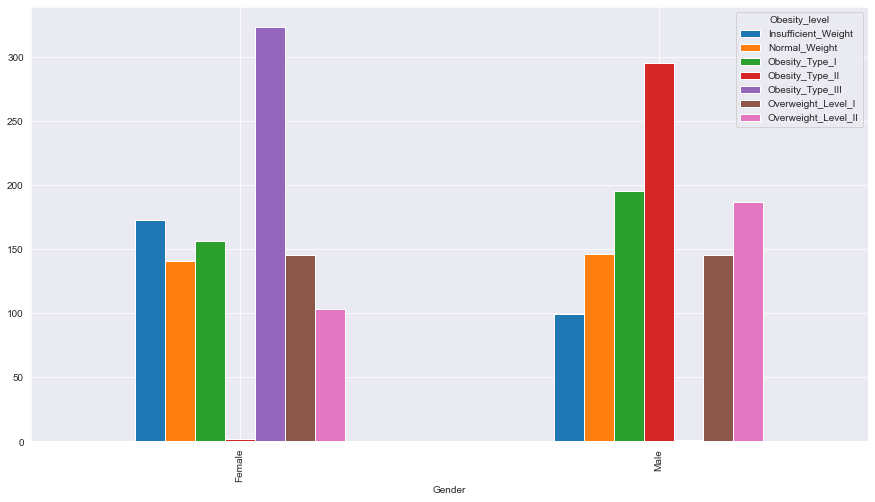

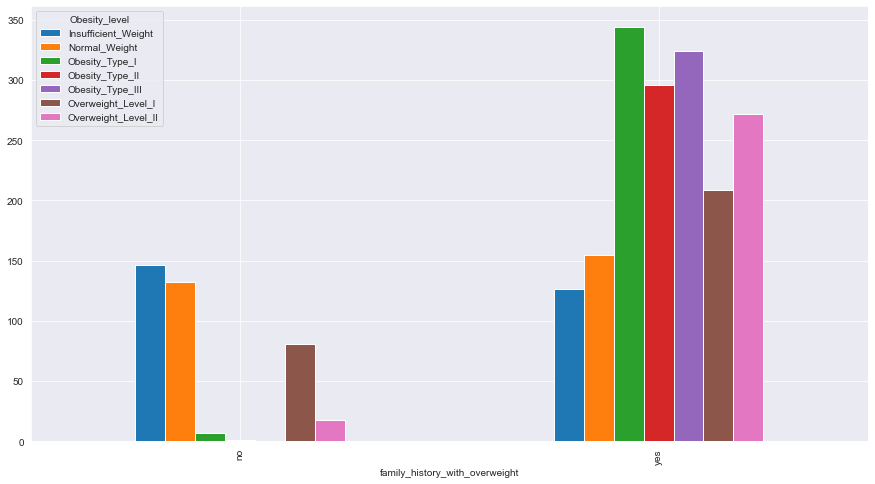

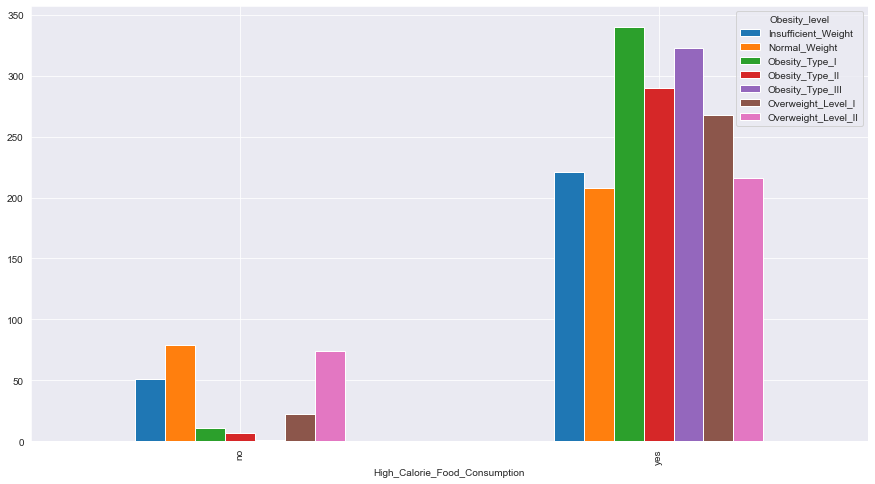

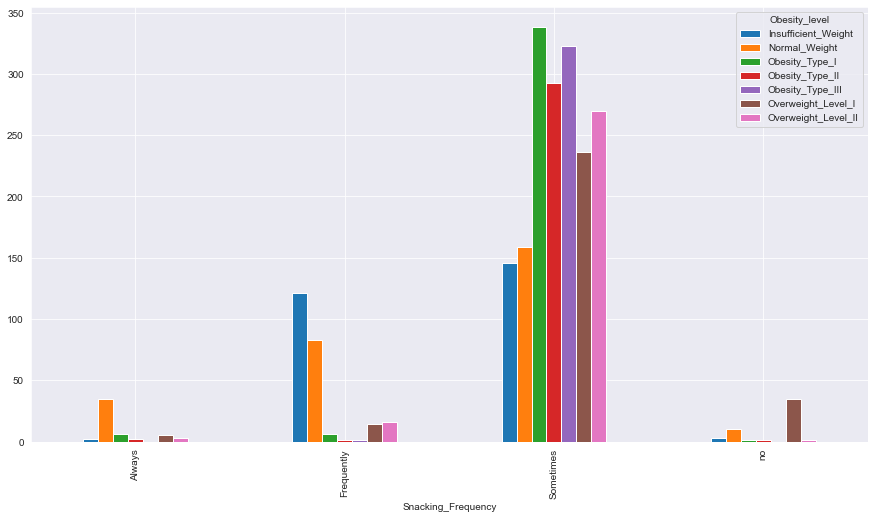

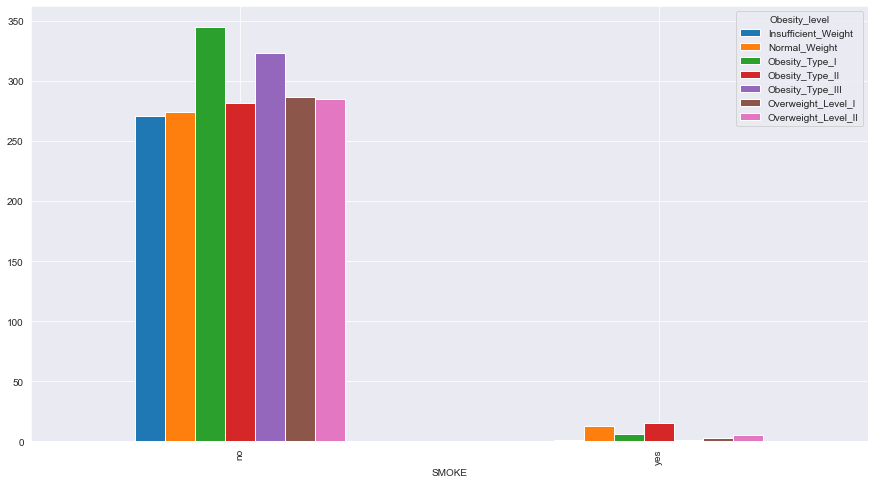

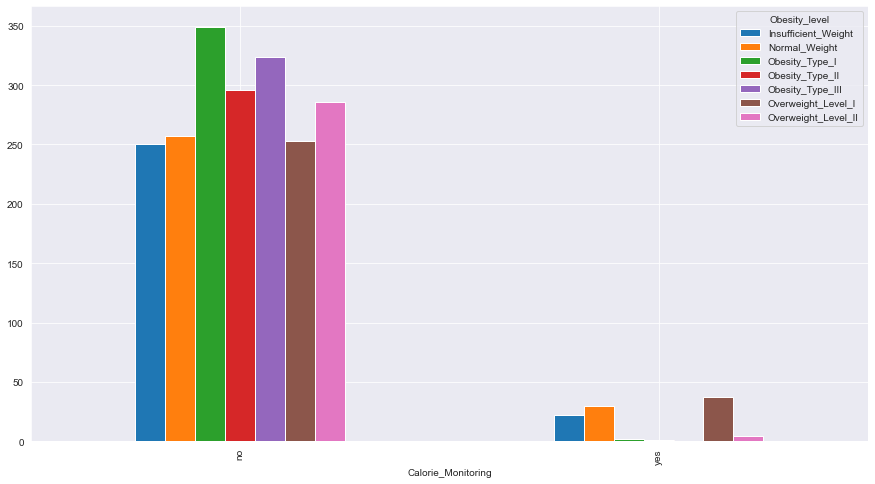

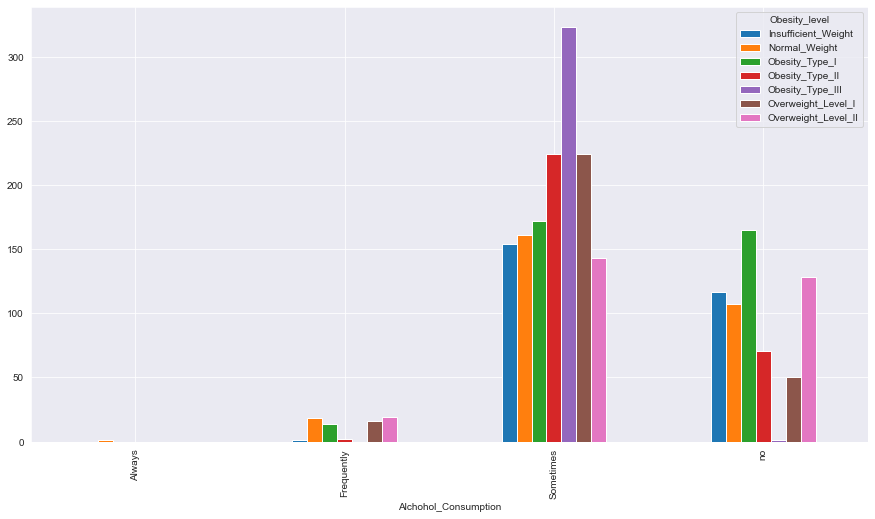

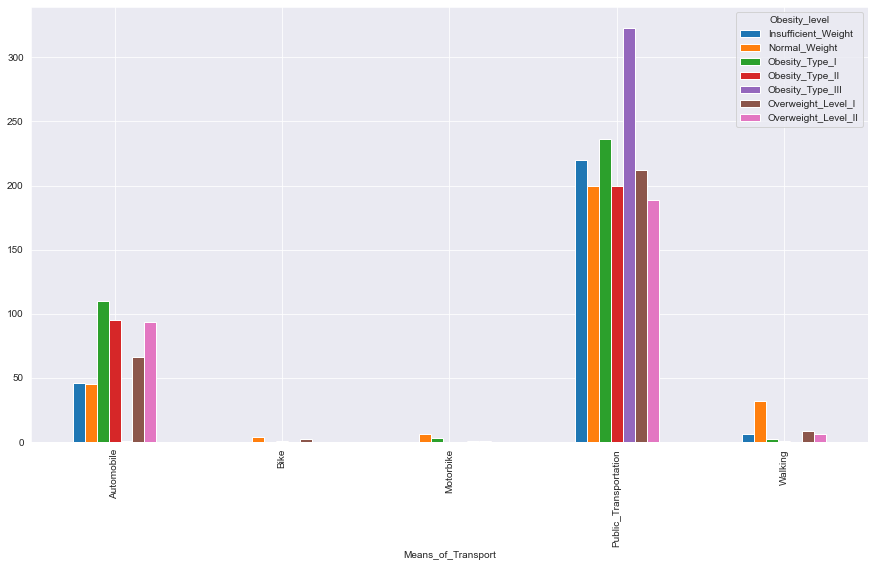

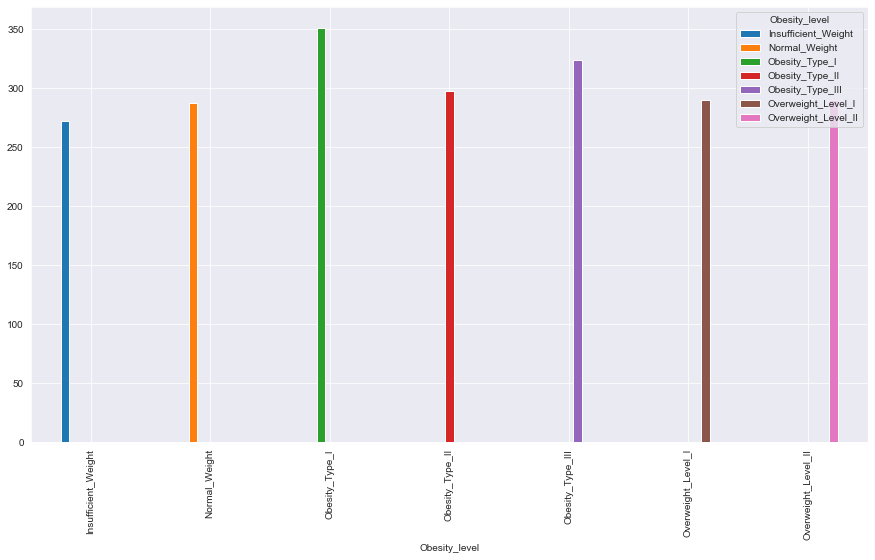

In [657]:
for i,col in enumerate(categoricals.columns):
    cat1=categoricals.groupby([col,'Obesity_level'])['Obesity_level'].count().unstack()
    cat1.plot(kind='bar',figsize=(15,8))


### Observation  on Results

* The most common type of obesity is type 1 followed closely by type 3
* The most common form of obesity among the female population was type 3 while in the male population was type2
* Most People with a family history of being overweight tend to be obese as well
* There is a high correlation of high calorie food intake with all levels of obesity
* People who had consumed food in between meals (snacking) frequently were observed to have insufficient weight as compared to the demographic who snacked sometimes that were mostly obese
* Smoking was not a very strong factor affecting obesity and overweight levels in the study
* Majority of the respondents did not monitor their calories
* The preferred means of Transport among the population was public transport

# PRE-PROCESSING

### Numerical Data outlier Treatment using Z score


zscore = (sample-mean)/std

In [658]:
Obesity_data['zscore_age']=(Obesity_data.Age-Obesity_data.Age.mean())/Obesity_data.Age.std()
Obesity_data['zscore_meals']=(Obesity_data.Number_of_Main_Meals-Obesity_data.Number_of_Main_Meals.mean())/Obesity_data.Number_of_Main_Meals.std()


<AxesSubplot:>

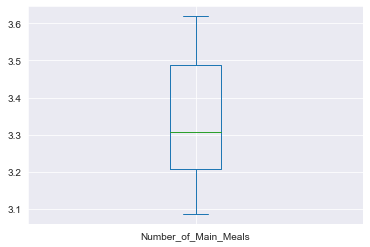

In [659]:
Obesity_data.Number_of_Main_Meals[(Obesity_data.zscore_meals<=1.2) & (Obesity_data.zscore_meals>=.5)].plot(kind='box')

<AxesSubplot:>

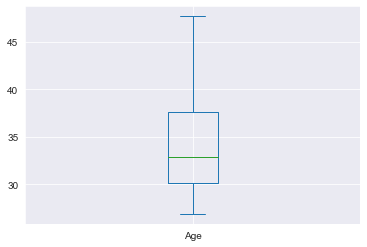

In [660]:
Obesity_data.Age[(Obesity_data.zscore_age<=4.1) & (Obesity_data.zscore_age>=.4)].plot(kind='box')

In [661]:
Obesity_data= Obesity_data.drop(Obesity_data[(Obesity_data.zscore_meals<=1.2) & (Obesity_data.zscore_meals>=.5)].index)
Obesity_data= Obesity_data.drop(Obesity_data[(Obesity_data.zscore_age<=3.9) & (Obesity_data.zscore_age>=.4)].index)

In [662]:
Obesity_data.drop(['zscore_age','zscore_meals'], inplace=True, axis=1)

## CATEGORICAL DATA ENCODING

In [663]:
Obesity_data[Obesity_data.select_dtypes(['object']).columns] = Obesity_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [664]:
#dataframe storing original target values with their label encoded values
dat=[]
dat=Obesity_data.Obesity_level.unique()
data = pd.DataFrame({'index':[0,1,2,3,4,5,6],
        'obesity_level':dat})
data['Obesity_levelencoded'] = Le.fit_transform(data['obesity_level'].values)
data = data.set_index('index')


In [665]:
data

,obesity_level,Obesity_levelencoded
index,,
0,Normal_Weight,1
1,Overweight_Level_II,6
2,Obesity_Type_I,2
3,Overweight_Level_I,5
4,Insufficient_Weight,0
5,Obesity_Type_II,3
6,Obesity_Type_III,4


In [631]:
#label encoding : Gender, SMOKE, Calorie Monitoring, Obesity level, family history with overweight, high calorie food consumption
Le = preprocessing.LabelEncoder()
Target=['Obesity_level']
label=['Gender', 'SMOKE', 'Calorie_Monitoring','family_history_with_overweight','High_Calorie_Food_Consumption']
Obesity_data[label] = Obesity_data[label].apply(Le.fit_transform)
Obesity_data[Target] = Obesity_data[Target].apply(Le.fit_transform)

In [546]:
#one hot encoding: Alchohol consumption,Means of transport,snacking
one_hot=['Means_of_Transport','Alchohol_Consumption','Snacking_Frequency']
Obesity_data= pd.get_dummies(Obesity_data, columns = one_hot)

### Feature Engineering : BMI

BMI = weight/(height)^2

In [548]:
Obesity_data['BMI']=Obesity_data.Weight/((Obesity_data.Height)*(Obesity_data.Height))

### Correlation

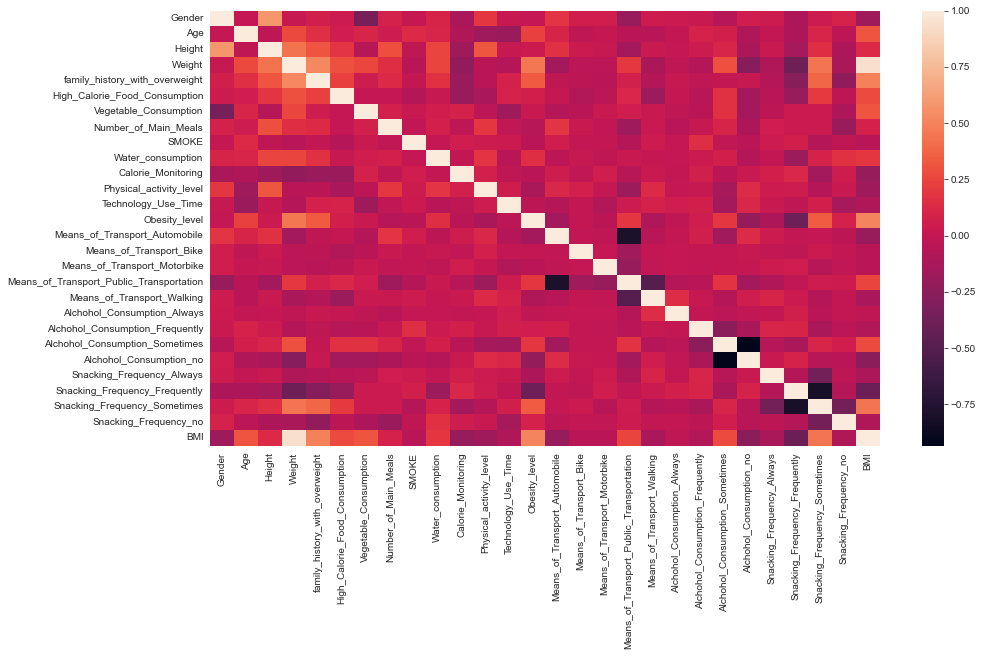

In [549]:
cor=Obesity_data.corr()
plt.figure(figsize=(15,8))
fig=sns.heatmap(cor)


In [550]:
#Correlation with output variable
cor_target = abs(cor["Obesity_level"])
cor_target 

Gender                                      0.003181
Age                                         0.226961
Height                                      0.027119
Weight                                      0.455624
family_history_with_overweight              0.334509
High_Calorie_Food_Consumption               0.069579
Vegetable_Consumption                       0.022184
Number_of_Main_Meals                        0.061473
SMOKE                                       0.043780
Water_consumption                           0.147924
Calorie_Monitoring                          0.049140
Physical_activity_level                     0.120556
Technology_Use_Time                         0.029575
Obesity_level                               1.000000
Means_of_Transport_Automobile               0.145647
Means_of_Transport_Bike                     0.008367
Means_of_Transport_Motorbike                0.041792
Means_of_Transport_Public_Transportation    0.186717
Means_of_Transport_Walking                  0.

In [551]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

Age                               0.226961
Weight                            0.455624
family_history_with_overweight    0.334509
Obesity_level                     1.000000
Alchohol_Consumption_no           0.213102
Snacking_Frequency_Frequently     0.383926
Snacking_Frequency_Sometimes      0.341072
BMI                               0.504121
Name: Obesity_level, dtype: float64

### Feature Selection 

In [552]:
warnings.filterwarnings('ignore')
selector = SelectKBest(f_classif, k=8)

feature_sel_data= Obesity_data.drop('Obesity_level',axis=1)
selected_data = selector.fit_transform(feature_sel_data, Obesity_data['Obesity_level'])
selected_data
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), 
                                 index=Obesity_data.index, 
                                 columns=feature_sel_data.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

,Gender,Weight,family_history_with_overweight,Vegetable_Consumption,Alchohol_Consumption_Sometimes,Snacking_Frequency_Frequently,Snacking_Frequency_Sometimes,BMI
0,0.0,64.0,1.0,2.0,0.0,0.0,1.0,24.386526
1,0.0,56.0,1.0,3.0,1.0,0.0,1.0,24.238227
2,1.0,77.0,1.0,2.0,0.0,0.0,1.0,23.765432
4,1.0,89.8,0.0,2.0,1.0,0.0,1.0,28.342381
6,0.0,55.0,1.0,3.0,1.0,0.0,1.0,24.444444


#### Features to select

Using sklearn to perform feature selection has yeilded the following features as bets to use for model creation
* Gender
* Weight
* Family history with overweight
* Vegetable consumption 
* Alchohol consumption sometimes
* snacking frequency (sometimes & Frequently)
* BMI

In [312]:
Obesity=Obesity_data[selected_columns]
Obesity['Target']=Obesity_data.Obesity_level
Obesity.head()

,Gender,Weight,family_history_with_overweight,Vegetable_Consumption,Alchohol_Consumption_Sometimes,Snacking_Frequency_Frequently,Snacking_Frequency_Sometimes,BMI,Target
0,0,64.0,1,2.0,0,0,1,24.386526,1
1,0,56.0,1,3.0,1,0,1,24.238227,1
2,1,77.0,1,2.0,0,0,1,23.765432,1
4,1,89.8,0,2.0,1,0,1,28.342381,6
6,0,55.0,1,3.0,1,0,1,24.444444,1


In [362]:
Obesity.Target.unique()

array([1, 6, 2, 5, 0, 3, 4])

# Test Train Split 

In [344]:
x = Obesity.drop(columns = 'Target')
y = Obesity['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#  Model Creation

In [346]:
log_reg = LogisticRegression(random_state = 42)
svm_clf = SVC(random_state = 42)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state = 42)
dtree_clf = DecisionTreeClassifier(random_state = 42)
Lda = LDA()

models = {'LogisticRegression': log_reg, 'SVC': svm_clf, 'KNeighborsClassifier': knn_clf, 'LDA':Lda,
          'RandomForestClassifier': rf_clf, 'DecisionTreeClassifier':dtree_clf}

# Model Selection

In [347]:
def model_selection(models):
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_predict_trian = model.predict(x_train)
        y_predict_test = model.predict(x_test)
        print(f'{model_name} Training Accuracy:', accuracy_score(y_train, np.round(y_predict_trian)))
        print(f'{model_name} Testing Accuracy:', accuracy_score(y_test, np.round(y_predict_test)))
        print('\n')

In [348]:
model_selection(models)

LogisticRegression Training Accuracy: 0.6487341772151899
LogisticRegression Testing Accuracy: 0.6107594936708861


SVC Training Accuracy: 0.6756329113924051
SVC Testing Accuracy: 0.6740506329113924


KNeighborsClassifier Training Accuracy: 0.9770569620253164
KNeighborsClassifier Testing Accuracy: 0.9620253164556962


LDA Training Accuracy: 0.930379746835443
LDA Testing Accuracy: 0.8987341772151899


RandomForestClassifier Training Accuracy: 1.0
RandomForestClassifier Testing Accuracy: 0.9778481012658228


DecisionTreeClassifier Training Accuracy: 1.0
DecisionTreeClassifier Testing Accuracy: 0.990506329113924




# Hyper-Parameter tuning KNN classifier

In [353]:
KNN = KNeighborsClassifier()

hyperparameters = {'n_neighbors' : np.arange(1,15),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [354]:
grid_search = GridSearchCV(KNN, hyperparameters)
grid_search.fit(x_train, y_train)

grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [355]:
KNN_tuned = KNeighborsClassifier(n_neighbors=1)
KNN_tuned.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Model Evaluation 

Text(0.5, 43.0, 'Predicted Label')

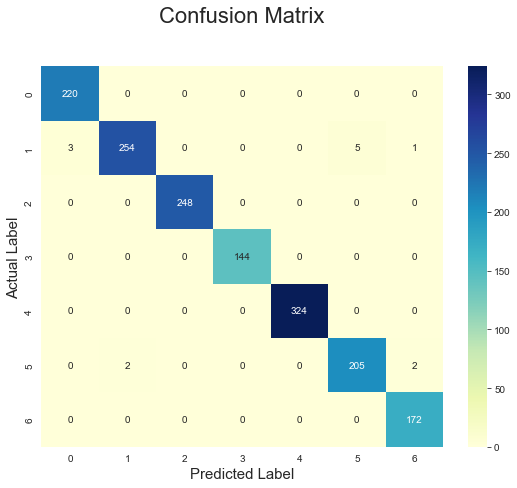

In [445]:
#confusion Matrix
y_predict = KNN_tuned.predict(x)

cnf_matrix = confusion_matrix(y, y_predict)

class_names = [0,1,2,3,4,5,6]
tick_marks = np.arange(len(class_names))
plt.figure(figsize = (9, 7))

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')

plt.title('Confusion Matrix', y = 1.1, fontsize = 22)
plt.ylabel('Actual Label', fontsize = 15)
plt.xlabel('Predicted Label', fontsize = 15)

In [634]:
#to revert encoded data back to original formart
data

,obesity_level,Obesity_levelencoded
index,,
0,Normal_Weight,1
1,Overweight_Level_II,6
2,Obesity_Type_I,2
3,Overweight_Level_I,5
4,Insufficient_Weight,0
5,Obesity_Type_II,3
6,Obesity_Type_III,4


In [643]:
#ac
scores=pd.DataFrame(classification_report(y,y_predict,output_dict=True))
scores=scores.rename(columns = {'1': 'Normal_Weight','6':'Overweight_Level_II','2':'Obesity_Type_I',
                        '5':'Overweight_Level_I','0':'Insufficient_Weight','3':'Obesity_Type_II','4':'Obesity_Type_III'}) 
scores.transpose()

,precision,recall,f1-score,support
Insufficient_Weight,0.986547,1.000000,0.993228,220.000000
Normal_Weight,0.992188,0.965779,0.978805,263.000000
Obesity_Type_I,1.000000,1.000000,1.000000,248.000000
Obesity_Type_II,1.000000,1.000000,1.000000,144.000000
Obesity_Type_III,1.000000,1.000000,1.000000,324.000000
Overweight_Level_I,0.976190,0.980861,0.978520,209.000000
Overweight_Level_II,0.982857,1.000000,0.991354,172.000000
accuracy,0.991772,0.991772,0.991772,0.991772
macro avg,0.991112,0.992377,0.991701,1580.000000
weighted avg,0.991811,0.991772,0.991747,1580.000000


# KNN classifier is the best  is the best model for prediction

In [666]:
# save the model 
pickle.dump(KNN_tuned, open('KNN_model', 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'KNN_model2'

# Conclusion
Gender,Weight,family_history_with_overweight,Vegetable_Consumption,Alchohol_Consumption_Sometimes	Snacking_Frequency_Frequently,Snacking_Frequency_Sometimes and BMI are the most important factors in identifying persons who are at risk of having obesity and overweight complications. Other variables hold less significance while evaluating the model.